In [1]:
import pandas as pd
pd.set_option('max_colwidth',400)

In [2]:
!ls

seriouseats.ipynb  Untitled.ipynb


In [3]:
df = pd.read_csv("../data/seriouseats/seriouseats.csv")
df.head()

,title,short_description,thumbnail,url,description,directions,ingredients,rating,total_time,active_time,yields
0,Jammy Fruit Bars,"Simple but satisfying fruit bars, made with your favorite fresh fruit or jam.",https://www.seriouseats.com/2019/05/20190429-fruit-oat-bars-vicky-wasik-20-625x469.jpg,https://www.seriouseats.com/recipes/2019/05/jammy-fruit-bars.html,"These fruity, oaty bars are inspired by Icelandic Hjónabandssæla (often translated as ""happy marriage cake""), but perhaps closer to an American bar cookie in execution. They're hearty and rich, thanks to plenty of rolled oats and butter in the crust and crumb topping, with a flavorful layer of jam or fresh fruit in between. What kind? That's all up to you!","Getting Ready: Adjust oven rack to lower-middle position and preheat to 350°F (180°C). Line an 8- by 2-inch square, anodized aluminum pan with two long strips of parchment to cover the bottom and sides, creasing as needed to ensure a secure fit.||||Make the Dough: In a large bowl, combine the rolled oats, all-purpose flour, brown sugar, baking powder, salt, baking soda, and cinnamon, then mix ...","For the Dough:||||4 1/2 ounces old fashioned rolled oats, not quick cooking, instant, or thick cut (about 1 1/3 cup; 128g)||||4 1/2 ounces all-purpose flour (about 1 cup, spooned; 128g)||||6 ounces light brown sugar (about 3/4 cup, firmly packed; 170g)||||1 teaspoon baking powder||||1 teaspoon (4g) Diamond Crystal kosher salt, plus more for sprinkling; for table salt, use about half as much by...",4.571429,About 90 minutes,about 15 minutes,About nine 3-inch squares
1,Balsamic Glazed Baby Back Ribs,"Smoky, sweet, and tangy ribs.",https://www.seriouseats.com/recipes/images/2016/07/20130519-252806-balsamic-glazed-ribs-625x469.jpg,https://www.seriouseats.com/recipes/2013/05/balsamic-glazed-baby-back-ribs-recipe.html,"Nothing can fulfill the defining barbecue trifecta of smoky, sweet, and tangy quite like ribs. These ribs combine a rub that features a trio of peppercorns with a low and slow cook over cherry wood. A brushing of balsamic barbecue sauce in the last half hour leaves the ribs with a glistening sheen.","To make the rub: Mix together brown sugar, salt, sugar, paprika, white pepper, black pepper, ground mustard, dried thyme, garlic powder, Szechuan peppercorns, and cayenne pepper in a small bowl. Set aside.||||Remove membrane from back of each rack of ribs and trim meat of excess fat. Season ribs liberally with rub all over.||||Fire up smoker or grill to 225°F, adding chunks of smoking wood whe...",For the Rub:||||2 tablespoons dark brown sugar||||2 tablespoons Kosher salt||||1 tablespoon granulated sugar||||1 tablespoon paprika||||1/2 teaspoon ground white pepper||||1/2 teaspoon ground black pepper||||1/2 teaspoon ground mustard||||1/2 teaspoon dried thyme||||1/2 teaspoon garlic powder||||1/2 teaspoon ground Szechuan peppercorns||||1/4 teaspoon cayenne pepper|||| ||||2 racks baby back r...,NaN,5 hours,45 minutes,Serves 4
2,The Best Meatball Pizza,"Does size matter? When it comes to meatballs on pizza, the answer is yes.",https://www.seriouseats.com/recipes/images/2015/01/20150109-meatball-pizza-small-balls-8-625x469.jpg,https://www.seriouseats.com/recipes/2015/01/meatball-pizza-recipe.html,"Meatball pizza consists of two Italian-American favorites, all rolled into one spectacularly comforting dish. But, as with all mashups, there's a bit of finesse to getting it right. It starts with our recipe for tender and juicy Italian-American meatballs—keeping the balls very small, which ensures that every bite is meaty—and pairs it with a simple tomato sauce flavored with a small amount of...","Set aside 1/2 cup meatball mixture. Form remaining mixture into small balls, roughly 3/4 inch in diameter. Set aside on a plate in the refrigerator.||||Place a Baking Steel on the top rack of the oven directly under the broiler and preheat oven to its highest possible temperature.||||Heat 2 tablespoons (30ml) oil in a medium saucepan 

In [4]:
df.describe()

,rating
count,2898.000000
mean,4.418871
std,0.825618
min,1.000000
25%,4.000000
50%,4.750000
75%,5.000000
max,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8312 entries, 0 to 8311
Data columns (total 11 columns):
title                8312 non-null object
short_description    2114 non-null object
thumbnail            8312 non-null object
url                  8312 non-null object
description          7787 non-null object
directions           8282 non-null object
ingredients          8282 non-null object
rating               2898 non-null float64
total_time           5810 non-null object
active_time          6119 non-null object
yields               7518 non-null object
dtypes: float64(1), object(10)
memory usage: 714.4+ KB


# Download Images of Meals

In [6]:
from urllib import request
from urllib.error import HTTPError
import os
from tqdm import tqdm_notebook
import time

image_urls = df['thumbnail']
for url in tqdm_notebook(image_urls):
    image_path = os.path.join('../data/seriouseats/images', url.rsplit('/', 1)[-1])
    if not os.path.isfile(image_path):
        req = request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        try:
            page = request.urlopen(req)
            with open(image_path, 'wb') as f:  
                f.write(page.read())
                time.sleep(0.5)
        except Exception as e:
            print(f"Skipping {url} ({e})")

Skipping https://www.seriouseats.com/recipes/images/Fried%20Rice%20with%20Ginger.jpg (HTTP Error 404: Not Found)
Skipping https://www.seriouseats.com/recipes/images/Dinner%20Tonight%20-%20Blumenthal%27s%20Roast%20Potatoes.jpg (HTTP Error 404: Not Found)
Skipping https://www.seriouseats.com/recipes/images/20081006%2Csichuan%20sirloin%20salad.jpg (HTTP Error 404: Not Found)
Skipping https://www.seriouseats.com/recipes/images/Dinner%20Tonight%20-%20Pacific%20Rim%20Glazed%20Flank%20Steak.jpg (HTTP Error 404: Not Found)
Skipping https://www.seriouseats.com/recipes/images/Dinner%20Tonight%20-%20Sopes.jpg (HTTP Error 404: Not Found)
Skipping https://www.seriouseats.com/recipes/images/Dinner%20Tonight%20-%20Shrimp%20Tacos%20with%20Pumpkin%20Seed%20Sauce.jpg (HTTP Error 404: Not Found)
Skipping https://www.seriouseats.com/recipes/images/Serious%20Barbecue.jpg (HTTP Error 404: Not Found)
Skipping https://www.seriouseats.com/recipes/images/Dinner%20Tonight%20-%20Sauteed%20Broccoli%20with%20Crispy

In [7]:
df['image_path'] = df['thumbnail'].apply(lambda x: os.path.join('../data/seriouseats/images', x.rsplit('/', 1)[-1]))
df = df[df['image_path'].apply(lambda x: os.path.isfile(x))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8304 entries, 0 to 8311
Data columns (total 12 columns):
title                8304 non-null object
short_description    2114 non-null object
thumbnail            8304 non-null object
url                  8304 non-null object
description          7779 non-null object
directions           8274 non-null object
ingredients          8274 non-null object
rating               2897 non-null float64
total_time           5810 non-null object
active_time          6118 non-null object
yields               7515 non-null object
image_path           8304 non-null object
dtypes: float64(1), object(11)
memory usage: 843.4+ KB


# Cluster Recipes accoring to Image Similarity

In [8]:
import tensorflow as tf
tf.__version__

'2.0.0-alpha0'

In [9]:
df_images = df[['title', 'image_path']]
df_images.head()

,title,image_path
0,Jammy Fruit Bars,../data/seriouseats/images/20190429-fruit-oat-bars-vicky-wasik-20-625x469.jpg
1,Balsamic Glazed Baby Back Ribs,../data/seriouseats/images/20130519-252806-balsamic-glazed-ribs-625x469.jpg
2,The Best Meatball Pizza,../data/seriouseats/images/20150109-meatball-pizza-small-balls-8-625x469.jpg
3,Easy Pork Rillettes (Slow-Cooked Pork Spread),../data/seriouseats/images/20170215-pork-rillettes-12-625x469.jpg
4,Duck Pastrami,../data/seriouseats/images/20130227-242590-duck-pastrami.jpg


In [10]:
IMAGE_SIZE = 224
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=True,
    weights='imagenet'
)

In [12]:
from keras.applications import imagenet_utils

def process_img(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img)
    img = (tf.cast(img, tf.float32)/127.5) - 1
    img = tf.image.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    img = img[:,:,:3] # discard alpha channel of PNGs
    return img

data = tf.data.Dataset.from_tensor_slices(df_images['image_path'].tolist()).map(process_img).batch(5)

In [13]:
pred = base_model.predict(data)

In [23]:
df_images['prediction'] = [p[0][1] for p in imagenet_utils.decode_predictions(pred)]
df_images.head()

/home/mike/.local/share/virtualenvs/seefood-qNVnXCKQ/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,title,image_path,prediction
0,Jammy Fruit Bars,../data/seriouseats/images/20190429-fruit-oat-bars-vicky-wasik-20-625x469.jpg,tray
1,Balsamic Glazed Baby Back Ribs,../data/seriouseats/images/20130519-252806-balsamic-glazed-ribs-625x469.jpg,meat_loaf
2,The Best Meatball Pizza,../data/seriouseats/images/20150109-meatball-pizza-small-balls-8-625x469.jpg,pizza
3,Easy Pork Rillettes (Slow-Cooked Pork Spread),../data/seriouseats/images/20170215-pork-rillettes-12-625x469.jpg,mixing_bowl
4,Duck Pastrami,../data/seriouseats/images/20130227-242590-duck-pastrami.jpg,ice_cream


In [39]:
import glob
import random
import base64

from PIL import Image
from io import BytesIO
from IPython.display import HTML

pd.set_option('display.max_colwidth', -1)

def get_thumbnail(path):
    i = Image.open(path).convert('RGB')
    i.thumbnail((224, 224), Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

,title,image,prediction
4551,Buffalo Grilled Corn,,frying_pan
7386,Easy Roasted Broccoli,,broccoli
6912,Potato Chops (Meat-Stuffed Indian Potato Pancakes),,plate
4849,Making Peanut Butter-Flavored Cocktails with Peanut Punch,,chocolate_sauce
3315,Lentils and Mozzarella Caprese From 'Feast',,burrito
1264,An Apple a Week: Tarte Fine aux 'Picked' Pommes,,pomegranate
2026,Gingery Pork Chops With Apricot and Feta Salad,,guacamole
5761,Chipotle Honey-Butter Potato Chips,,potpie
3235,Dinner Tonight: Potato Chip–Crust Salmon,,plate
4946,"Marc Vetri's Rigatoni with Chicken Livers, Cipollini Onions, and Sage",,meat_loaf

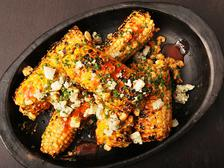
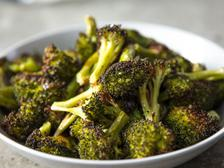
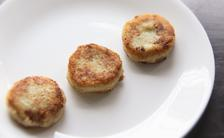
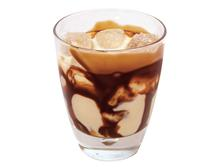
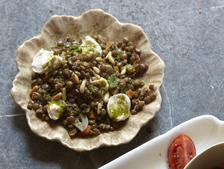
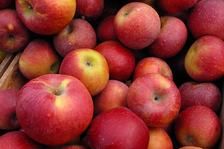
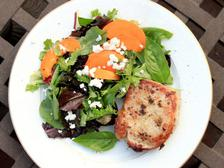
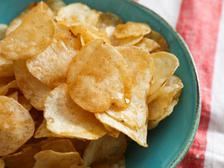
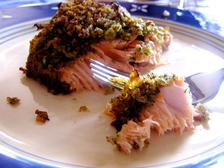
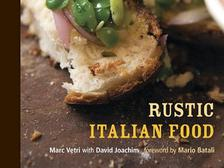
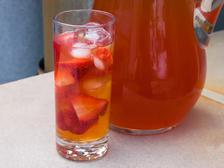
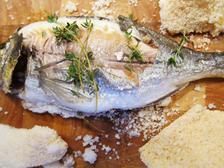
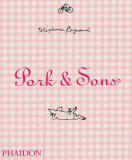
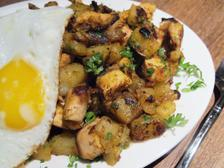
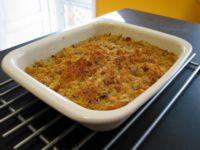
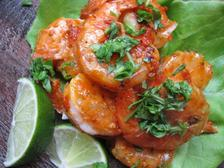
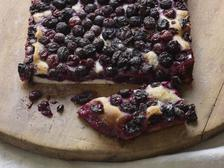
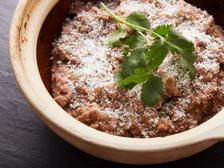
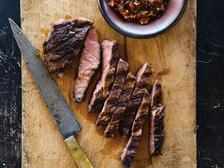
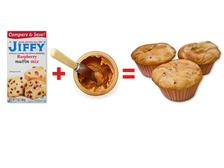

In [47]:
df_images_sample = df_images.sample(20)
df_images_sample['image'] = df_images_sample.image_path.map(lambda x: get_thumbnail(x))
HTML(df_images_sample[['title', 'image', 'prediction']].to_html(formatters={'image': image_formatter}, escape=False))